In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

In [13]:
data_csv = pd.read_csv('diabetes.csv')

In [14]:
data_csv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Import Dataset

In [8]:
data_from_csv = pd.read_csv("diabetes.csv")

In [9]:
data_from_csv.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Pisahkan Fitur dan Target

In [16]:
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
X = data_csv[features]
y = data_csv[["Outcome"]]

## One-Hot Encoding untuk Target (Output)

In [17]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

##  Standarisasi Fitur

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split Data untuk Training dan Testing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

## Bangun Model Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),          # Input Layer
    Dense(10, activation='relu'),              # Hidden Layer 1
    Dense(64, activation='relu'),              # Hidden Layer 2
    Dense(32, activation='relu'),              # Hidden Layer 3
    Dropout(0.2),                              # Dropout Layer
    Dense(16, activation='relu'),              # Hidden Layer 4
    Dense(8, activation='relu'),               # Hidden Layer 5
    Dense(y_train.shape[1], activation='softmax')  # Output Layer
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [14]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3806 - loss: 0.7137 - val_accuracy: 0.6354 - val_loss: 0.6887
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6452 - loss: 0.6867 - val_accuracy: 0.6354 - val_loss: 0.6832
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6575 - loss: 0.6798 - val_accuracy: 0.6354 - val_loss: 0.6756
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.6654 - val_accuracy: 0.6927 - val_loss: 0.6535
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7372 - loss: 0.6343 - val_accuracy: 0.6927 - val_loss: 0.6207
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7587 - loss: 0.5737 - val_accuracy: 0.7292 - val_loss: 0.5827
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7392 - loss: 0.5567 - val_accuracy: 0.7240 - val_loss: 0.5724
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7709 - loss: 0.4924 - val_accuracy: 0.7240

## Plot Grafik Akurasi dan Loss

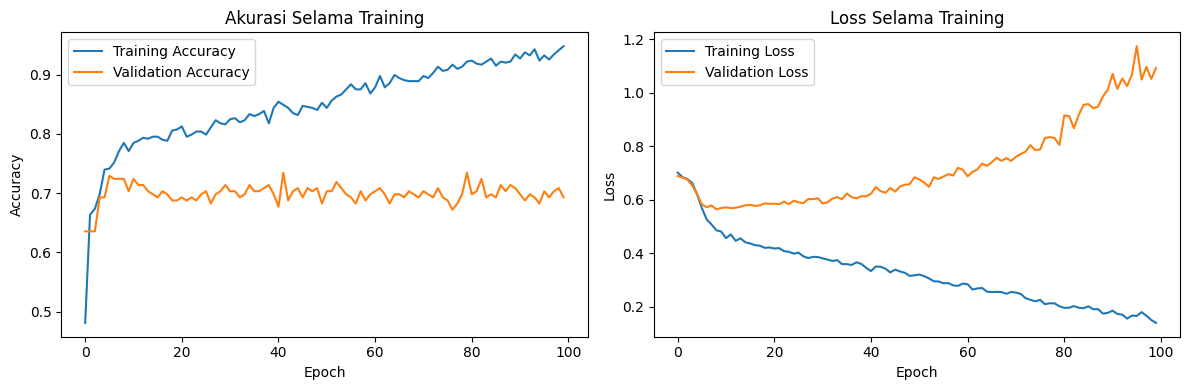

In [15]:
import matplotlib.pyplot as plt

# Akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluasi

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

## Cetak Hasil

In [21]:
print("Predicted Classes:", y_pred_classes)
print("True Classes:", y_true_classes)

Predicted Classes: [0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 1 0 0]
True Classes: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0]


## Confusion Matrix


Confusion Matrix:
[[92 31]
 [28 41]]


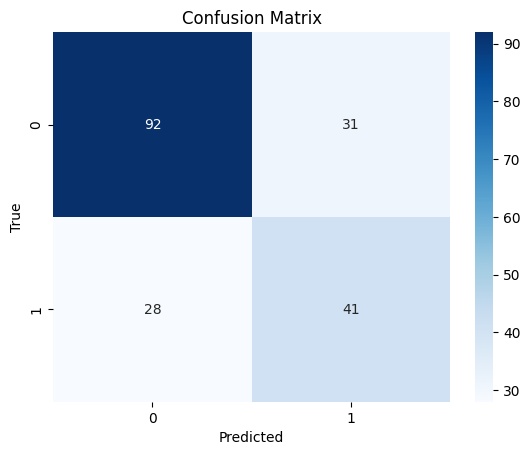

In [22]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Confusion Report

In [23]:
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       123
           1       0.57      0.59      0.58        69

    accuracy                           0.69       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.70      0.69      0.69       192



## Melatih Model

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Menghitung hasil Akurasi

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%\n')

Akurasi: 73.44%



## Evaluasi Model

In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model Random Forest:", accuracy)

Akurasi Model Random Forest: 0.734375


## Tes Prediksi

In [31]:
X_new_scaled = scaler.transform(np.array([[30, 25, 5, 0, 23, 85, 40, 0.5]]))

predictions = model.predict(X_new_scaled)

predicted_classes = np.argmax(predictions, axis=1)

predicted_labels = encoder.inverse_transform(predictions)

print("Predicted Classes:", predicted_classes)
print("Predicted Labels:", predicted_labels)

if predicted_labels[0][0] == 0:
    print("Hasil data menunjukkan anda TIDAK menderita Diabetes")
elif predicted_labels[0][0] == 1:
    print("Hasil data menunjukkan anda MENDERITA Diabetes")

Predicted Classes: [1]
Predicted Labels: [[1]]
Hasil data menunjukkan anda MENDERITA Diabetes


C:\laragon\www\Semester4-MachineLearningModel\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Membuat Model untuk API Flask

In [44]:
import pickle

# Simpan model, scaler, encoder
with open('neural_net_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('neural_net_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('neural_net_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [2]:
from flask import Flask, request, jsonify
import numpy as np
import pickle

# Inisialisasi Flask
app = Flask(__name__)

# Load model, scaler, encoder dari file
with open('neural_net_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('neural_net_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('neural_net_encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Ambil data JSON dari client
    input_data = np.array(data['features']).reshape(1, -1)

    # Preprocessing
    input_scaled = scaler.transform(input_data)

    # Prediksi
    prediction = model.predict(input_scaled)
    prediction_class = (prediction > 0.5).astype(int)
    label = encoder.inverse_transform(prediction_class.ravel())[0]

    # Kirim hasil
    return jsonify({
        'prediction': int(prediction_class[0][0]),
        'label': label
    })

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\laragon\www\Semester4-MachineLearningModel\venv\Lib\site-packages\IPython\core\interactiveshell.py:3675: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
